# 5. Análise dos dados - ESG

- requer download do modelo de linguagem Spacy. Com o ambiente virtual ativo, rodar a seguinte linha:
!python -m spacy download pt_core_news_lg

## Importa módulos e carrega banco de dados

In [4]:
import sys
sys.path.append('../src')
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import analise_nlp


In [5]:
diretorio_txt = "../data/txt"
df = pd.read_json("../data/json/respostas.json").transpose() # Cria um dataframe do Pandas
df.reset_index(inplace=True)
df.rename(columns={'index': 'Fundo'}, inplace=True)
df.set_index('Fundo', inplace=True)
df_metadados = pd.read_json("../data/json/metadados.json")# Cria um dataframe do Pandas
df_metadados.set_index('Fundo', inplace=True) # Estabelece a coluna "Fundo" como índice
df_geral = df.merge(df_metadados, left_index=True, right_index=True)

In [19]:
df.head(50)

,Origem metodologia ASG,Objetivo ASG,Objetivo Geral/Específico,Método ASG,Índice,Referência ASG,URL referência ASG,Relatório ASG,Origem Metodologia ASG,URL Referência ASG
Fundo,,,,,,,,,,
JGP ESG AÇÕES 100 PREV XP SEG FC FIA,n/d,n/d,n/d,n/d,n/d,n/d,n/d,Não,NaN,NaN
BB ASSET AÇÕES NORDEA GLOBAL DISRUPTION ESG IE FC,NaN,investir preponderantemente em cotas de fundos...,geral,[integração ESG],n/d,Sustainable Finance Disclosure Regulation (SFDR),NaN,Sim,externa,n/d
Aviv IGC ESG IDA FC FI Mult Cred Priv IE,n/d,n/d,n/d,n/d,n/d,n/d,n/d,não,NaN,NaN
Blackrock FIA Globais ESG IE,NaN,n/d,n/d,n/d,n/d,n/d,NaN,não,n/d,n/d
SICREDI ESG IS FIC FIE MULT,NaN,n/d,n/d,"[integração ESG, engajamento]",ISE B3,ANBIMA,NaN,Sim,interna,n/d
JGP ESG INST MASTER FIA IS,interna,aderência às práticas e parâmetros estabelecid...,geral,"[filtro negativo, integração ESG, engajamento]",n/d,n/d,https://esg.jgp.com.br/wp-content/uploads/2023...,Não,NaN,NaN
ACCESS ENERGY TRANSITION FIA SUS IS IE,NaN,alcançar retornos sustentáveis e acima do merc...,geral,n/d,n/d,Anbima,NaN,Sim,interna,https://www.bnpparibas-am.com/pt-br/institucio...
JGP ESG INST FC FIA - FEEDER VII,NaN,n/d,n/d,n/d,n/d,n/d,NaN,não,n/d,n/d
Mirova Glob Sust Eqt Dol Adv M FIA IE IS,n/d,n/d,n/d,n/d,n/d,n/d,n/d,não,NaN,NaN


 # Colunas do dataframe

In [7]:
df.columns

Index(['Origem metodologia ASG', 'Objetivo ASG', 'Objetivo Geral/Específico',
       'Método ASG', 'Índice', 'Referência ASG', 'URL referência ASG',
       'Relatório ASG', 'Origem Metodologia ASG', 'URL Referência ASG'],
      dtype='object')

# Contagem geral de palavras dos objetivos

In [8]:
df_objetivos = df[[
 'Objetivo ASG'
]].fillna(value='')
df_objetivos['texto_completo'] = df_objetivos.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
texto_completo = ' '.join(df_objetivos['texto_completo'].tolist())

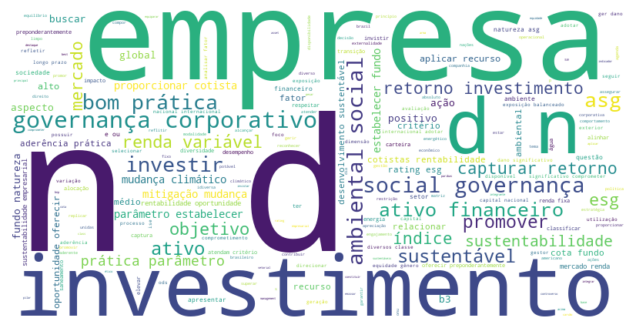

In [9]:
# Remover stop words e fazer word cloud
analise_nlp.gerar_word_cloud(analise_nlp.limpar_texto(texto_completo, analise_nlp.stop_words, return_string=True))

In [10]:
# TF-IDF
df_objetivos['texto_limpo'] = df_objetivos['texto_completo'].apply(lambda x: analise_nlp.limpar_texto(x, analise_nlp.stop_words, return_string=True))
tf_idf = analise_nlp.tfidf(df_objetivos['texto_limpo'].tolist())
soma_tfidf = tf_idf.sum(axis=0)
top_palavras = soma_tfidf.nlargest(20)
display(top_palavras)

investimento        7.001856
governança          6.925391
empresa             6.159490
prática             6.012511
corporativo         5.275999
fundo               4.968777
ambiental           4.785940
asg                 4.767287
social              4.673884
ativo               4.610280
mudança             4.541401
climático           4.520596
retorno             4.413162
mitigação           4.331073
bom                 4.267172
promover            3.832293
esg                 3.753906
investir            3.717460
sustentabilidade    3.606583
financeiro          3.530947
dtype: float64

## Percentagem de objetivos gerais ou específicos: qual a proporção de objetivos gerais e específicos dos fundos?

In [11]:
df["Objetivo Geral/Específico"].value_counts()/len(df["Objetivo Geral/Específico"]) * 100

Objetivo Geral/Específico
geral         46.575342
n/d           36.986301
específico    16.438356
Name: count, dtype: float64

## Métodos ASG: variedades e frequências: quais as principais metodologias ASG empregadas pelos fundos?

In [12]:
df_metodos = df[[
 'Método ASG'
]].fillna(value='')
# Mapeamento de valores antigos para novos
replace_dict = {
    'Best in Class': 'filtro positivo ("best-in-class")',
    'integração ASG': 'integração ESG',
    'filtro de exclusão': 'filtro negativo',
    'uso dos métodos de avaliação ESG proprietário': 'outros'
    
}

metodos_expandidos = df_metodos.explode('Método ASG')

# Substituindo os valores usando o dicionário de mapeamento
metodos_expandidos['Método ASG'] = metodos_expandidos['Método ASG'].replace(replace_dict)
metodos_counts = metodos_expandidos['Método ASG'].value_counts()
print(metodos_counts)

Método ASG
integração ESG                                                                                65
n/d                                                                                           55
engajamento                                                                                   41
filtro negativo                                                                               24
filtro positivo                                                                               18
investimento temático                                                                         15
filtro positivo ("best-in-class")                                                             10
best in class                                                                                  2
investimentos de impacto                                                                       1
restrições para investir em certos setores                                                     1
utilização de frame

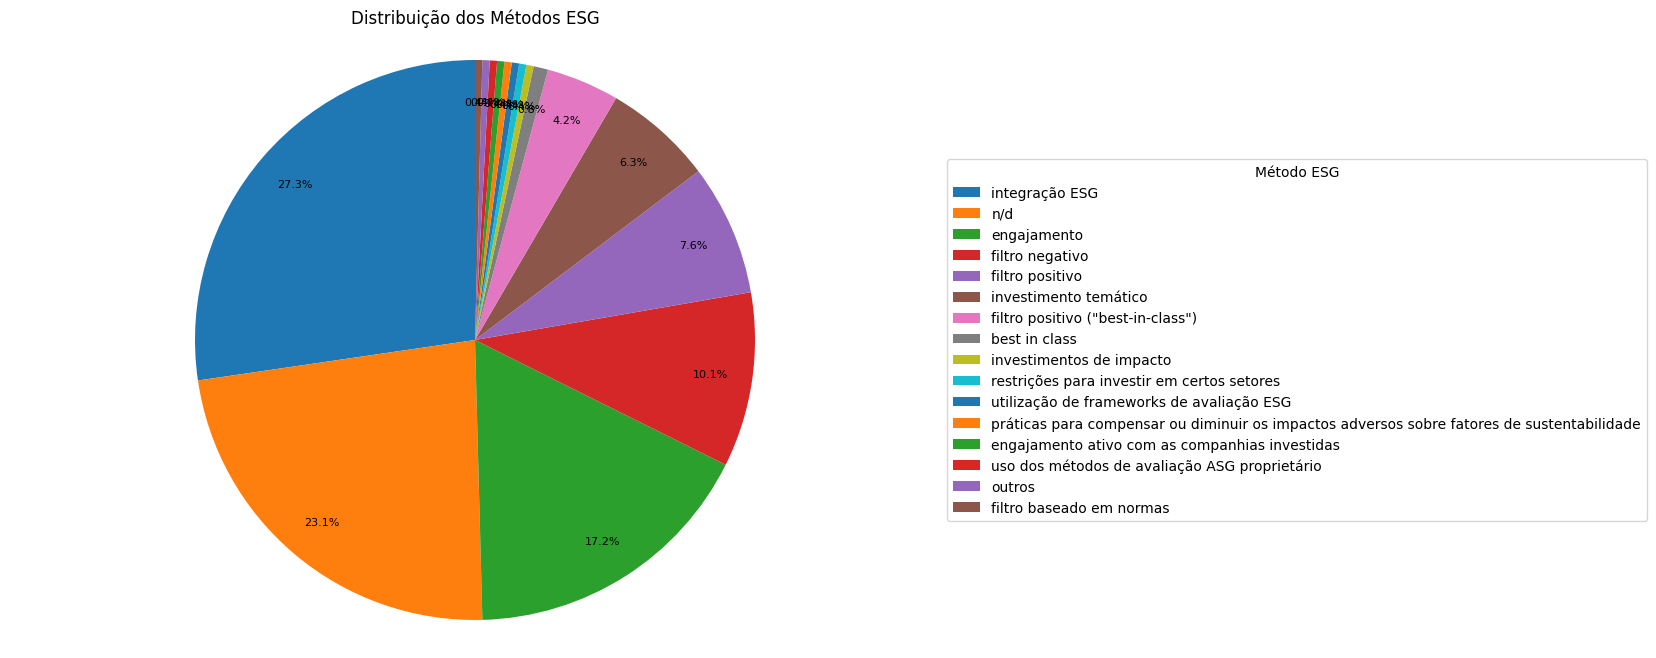

In [13]:
# Em gráfico
metodos_counts = metodos_expandidos['Método ASG'].value_counts()
percentagem = (metodos_counts / len(metodos_expandidos)) * 100
df_resultado = pd.DataFrame({
    'Número': metodos_counts,
    'Percentagem': percentagem
})
plt.figure(figsize=(12, 8))
patches, texts, autotexts = plt.pie(df_resultado['Percentagem'], startangle=90, autopct='%1.1f%%', pctdistance=0.85)
for text in texts + autotexts:
    text.set_fontsize(8)
plt.legend(df_resultado.index, title="Método ESG", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribuição dos Métodos ESG')
plt.axis('equal')
plt.show()

## Fundos que mencionam relatório ASG no regulamento: em que medida os fundos mencionam relatórios ASG em seu regulamento?

In [14]:
condicao_sim = df_geral['Relatório ASG'] == "Sim"
percentagem_sim = (condicao_sim.sum() / len(df_geral)) * 100
print(f"Percentagem de 'Sim' em 'Relatório ASG': {percentagem_sim:.2f}%")

Percentagem de 'Sim' em 'Relatório ASG': 23.29%


In [15]:
# Relatórios por gestor, em %
sim_df = df_geral[df_geral['Relatório ASG'] == "Sim"]
sim_count = sim_df.groupby('Gestor').size()
total_count = df_geral.groupby('Gestor').size()
percentagem_sim_por_gestor = (sim_count / total_count) * 100
data = {
    'Contagem Sim': sim_count,
    'Contagem Total': total_count,
    'Percentagem': percentagem_sim_por_gestor
}
table_df = pd.DataFrame(data)
display(table_df)

,Contagem Sim,Contagem Total,Percentagem
Gestor,,,
BANCO J SAFRA SA,NaN,1,NaN
BANCO SANTANDER (BRASIL) SA,NaN,1,NaN
BB ASSET MANAGEMENT,11.0,29,37.931034
BLACKROCK BRASIL GESTORA DE INVESTIMENTO,NaN,1,NaN
BNP PARIBAS ASSET,10.0,10,100.000000
BRADESCO,NaN,5,NaN
BRAM BRADESCO ASSET MANAGEMENT SA DTVM,1.0,16,6.250000
BRASILPREV SEGUROS E PREVIDENCIA SA,NaN,2,NaN
BTG PACTUAL,NaN,4,NaN


## Referências ASG: quais as principais referências ASG empregadas pelos fundos?

In [16]:
# Unifica e apresenta contagem de referências
df_ref = df[[
 'Referência ASG'
]].fillna(value='')
referencias_expandidas = df_ref.explode('Referência ASG')
mask_b3_cvm = referencias_expandidas['Referência ASG'].str.contains('Bolsa de Valores de São Paulo|Comissão de Valores Mobiliários', na=False)
mask_sfdr_blackrock = referencias_expandidas['Referência ASG'] == 'regulação europeia SFDR, BlackRock'
additional_data_b3_cvm = pd.DataFrame({'Referência ASG': ['B3', 'CVM'] * mask_b3_cvm.sum()})
additional_data_sfdr_blackrock = pd.DataFrame({'Referência ASG': ['Regulação Europeia SFDR', 'BlackRock'] * mask_sfdr_blackrock.sum()})
referencias_expandidas = referencias_expandidas[~mask_b3_cvm & ~mask_sfdr_blackrock]
referencias_expandidas = pd.concat([referencias_expandidas, additional_data_b3_cvm, additional_data_sfdr_blackrock], ignore_index=True)
replace_dict = {
    'Anbima': 'ANBIMA',
    'BM&FBOVESPA': 'B3',
    'B3 S.A.': 'B3',
    'Bradesco Asset Management': 'proprietária',
    'Bradesco Asset': 'proprietária',
    'S&P/B3 BRASIL ESG': 'S&P',
    'regulação europeia SFDR': 'Regulação Europeia SFDR',
    'taxonomia da União Europeia para atividades econômicas sustentáveis': 'Regulação Europeia SFDR',
    'Nações Unidas': 'Nações Unidas/ONU',
    'Pacto Global da ONU': 'Nações Unidas/ONU',
    'Princípios de Empoderamento Feminino da ONU Mulheres (WEPs)': 'Nações Unidas/ONU',
    'Princípios de Empoderamento Feminino da ONU Mulheres': 'Nações Unidas/ONU',
    'Agenda 2030 da ONU': 'Nações Unidas/ONU',
    'Formulário Metodologia ASG': 'ANBIMA',
    'Formulário de Metodologia ASG disponível no link': 'ANBIMA',
    'BRAM': 'proprietária', 'Sustainable Finance Disclosure Regulation (SFDR)': 'Regulação Europeia SFDR',     
    'política da gestora': 'proprietária',
    'www.itauassetmanagement.com.br/insights/investimento-responsavel': 'proprietária',
    'https://www.bb.com.br/docs/pub/siteEsp/dtvm/dwn/asg38226078.pdf': 'proprietária',
    'SAFRA': 'proprietária',
    'ISE B3': 'B3',
    'Bolsa de Valores de São Paulo (Novo Mercado e Níveis 1 e 2 de Governança Corporativa)': 'B3',
    'Comissão de Valores Mobiliários (CVM)': 'CVM',
    'S&P Dow Jones Índices LLC': 'S&P',
    'Política ASG da GESTORA': 'proprietária'
    
}
referencias_expandidas['Referência ASG'] = referencias_expandidas['Referência ASG'].replace(replace_dict)
ref_counts = referencias_expandidas['Referência ASG'].value_counts()
display(ref_counts)


Referência ASG
n/d                                                        76
ANBIMA                                                     25
B3                                                         13
proprietária                                                6
Regulação Europeia SFDR                                     4
CVM                                                         4
MSCI Inc.                                                   3
S&P                                                         3
Green Bond Principles, Climate Bonds                        2
Nações Unidas/ONU                                           2
GSIA (Global Sustainable Investment Alliance)               2
Resolução CMN nº 4.963/21                                   1
BlackRock                                                   1
PRI (Princípios da ONU para Investimentos Responsáveis)     1
Formulário de Metodologia ASG                               1
Bradesco Asset Management (Bram)                       

## Uso de índices: quais os principais índices ASG empregados pelos fundos?

In [17]:
unificar_indices = {
    'IGC-T': ['IGC-T', 'IGC-T divulgado pela B3', 'Índice BM&FBOVESPA de Governança Corporativa Trade – IGCT', 'IGCT da B3'],
    'IDIVERSA B3': ['IDIVERSA B3', 'Índice Diversidade B3'],
    'MSCI Extended Focus': ['MSCI USA Extended ESG Focus Index', 'MSCI Emerging Markets Extended ESG Focus Index', 'MSCI EAFE Extended ESG Focus Index'],
    'S&P/B3 BRASIL ESG': ['S&P/B3 BRASIL ESG', 'S&P/B3 BRAZIL ESG', 'S&P/B3 Brazil ESG'],
    'ISE': ['ISE B3', 'ISE'],
    
}

# Aplicar a função de unificação ao DataFrame
df_geral['Índice Unificado'] = df_geral['Índice'].apply(lambda x: next((unificado for unificado, originais in unificar_indices.items() if x in originais), x))

# Contar a quantidade de cada índice unificado
contagem_indices = df_geral['Índice Unificado'].value_counts()

# Exibir o resultado
print(contagem_indices)

Índice Unificado
n/d                                                          120
ISE                                                            8
S&P/B3 BRASIL ESG                                              6
MSCI Extended Focus                                            3
IDIVERSA B3                                                    3
IGC-T                                                          3
Índice BM&FBOVESPA de Governança Corporativa Trade - IGCT      1
FTSE Russell                                                   1
IGC-T, divulgado pela B3                                       1
Name: count, dtype: int64


In [18]:
# Salva banco de dados
df_geral.to_json("../data/json/dados.json")